**Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

**Shobit Halse | T083**

**Practical No. 10**

**Aim:** Data Visualization and Storytelling
* Create meaningful visualizations using data visualization tools
* Combine multiple visualizations to tell a compelling data story.
* Present the findings and insights in a clear and concise manner.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

df = pd.read_csv("Plane-Crashes.csv")

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

First 5 rows of dataset:


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 n

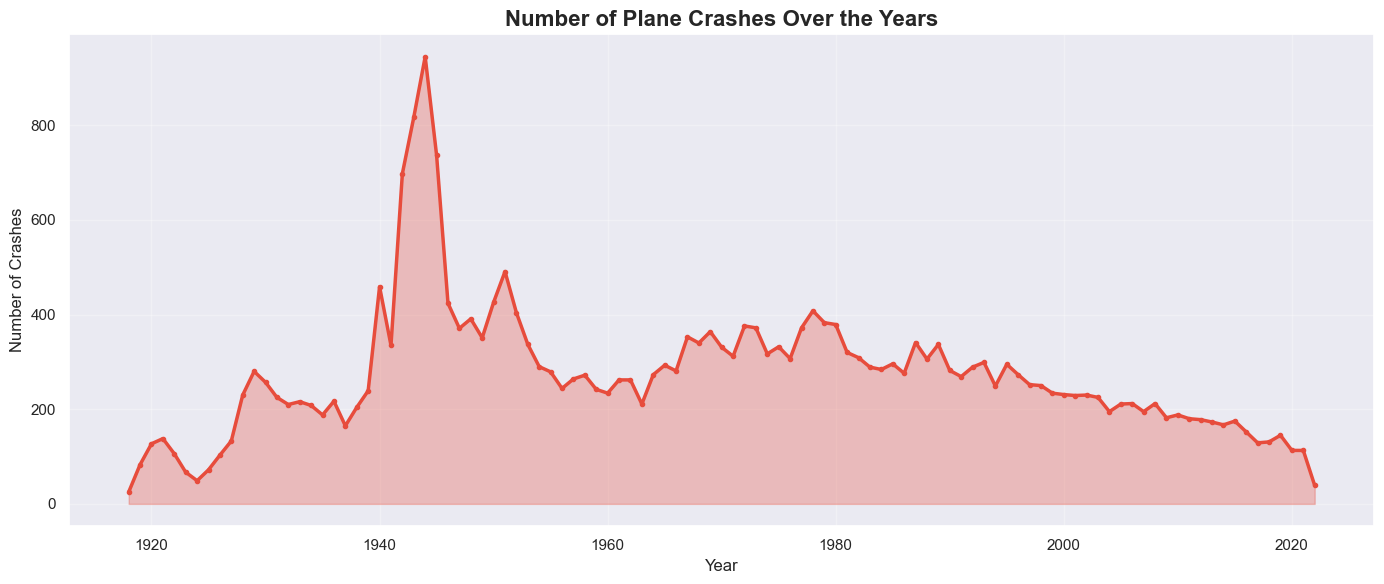

This visualization shows the historical trend of aviation accidents from 1918 to present.


In [2]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Total fatalities'] = pd.to_numeric(df['Total fatalities'], errors='coerce').fillna(0)
df['Crew fatalities'] = pd.to_numeric(df['Crew fatalities'], errors='coerce').fillna(0)
df['PAX fatalities'] = pd.to_numeric(df['PAX fatalities'], errors='coerce').fillna(0)

plt.figure(figsize=(14, 6))
yearly_crashes = df.groupby('Year').size()
plt.plot(yearly_crashes.index, yearly_crashes.values, color='#E74C3C', linewidth=2.5, marker='o', markersize=3)
plt.fill_between(yearly_crashes.index, yearly_crashes.values, alpha=0.3, color='#E74C3C')
plt.title("Number of Plane Crashes Over the Years", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("This visualization shows the historical trend of aviation accidents from 1918 to present.")

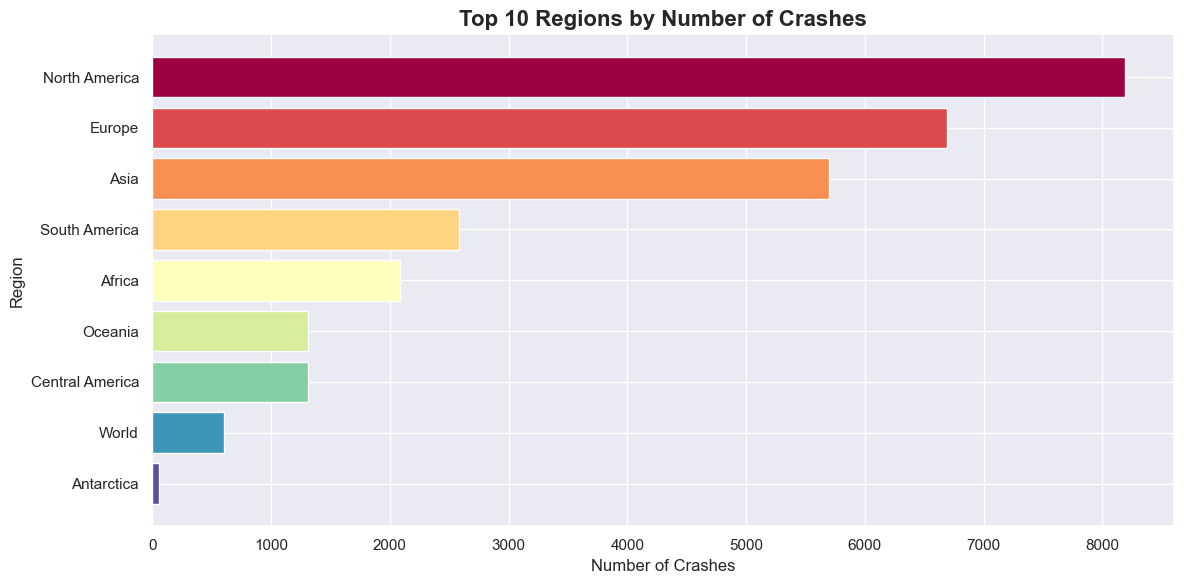

North America and Europe have the highest number of recorded aviation accidents.


In [3]:
plt.figure(figsize=(12, 6))
region_crashes = df['Region'].value_counts().head(10)
colors = plt.cm.Spectral(np.linspace(0, 1, len(region_crashes)))
bars = plt.barh(region_crashes.index, region_crashes.values, color=colors)
plt.title("Top 10 Regions by Number of Crashes", fontsize=16, fontweight='bold')
plt.xlabel("Number of Crashes")
plt.ylabel("Region")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("North America and Europe have the highest number of recorded aviation accidents.")

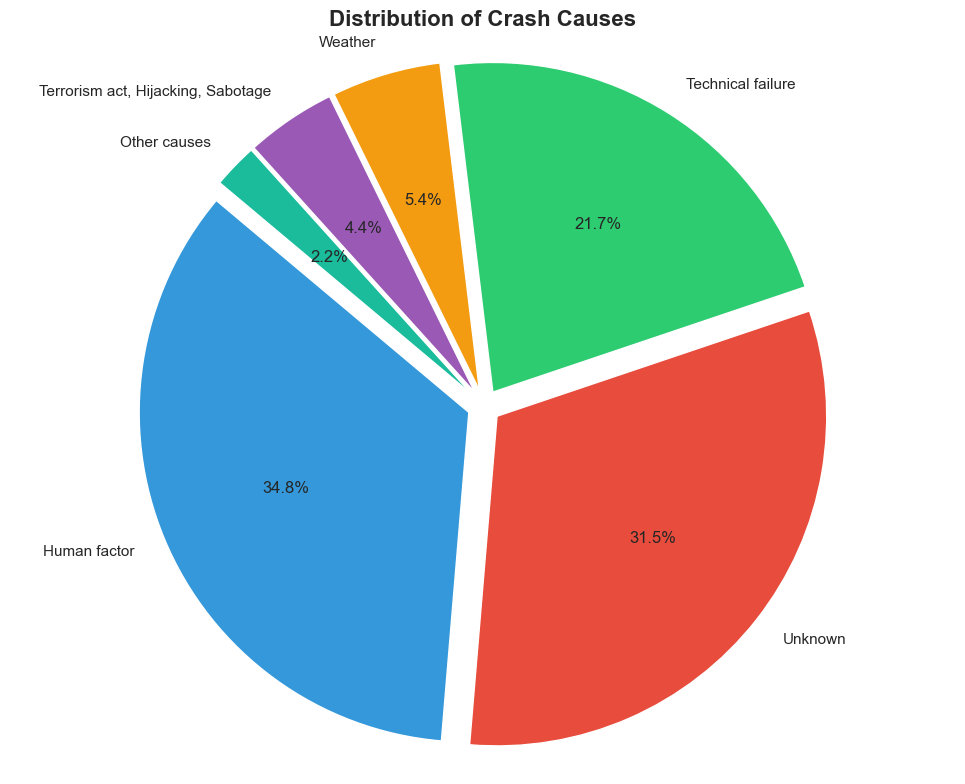

Technical failures and unknown causes account for the majority of aviation accidents.


In [4]:
plt.figure(figsize=(10, 8))
crash_causes = df['Crash cause'].value_counts().head(8)
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C', '#E67E22', '#34495E']
explode = [0.05] * len(crash_causes)
plt.pie(crash_causes.values, labels=crash_causes.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title("Distribution of Crash Causes", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Technical failures and unknown causes account for the majority of aviation accidents.")

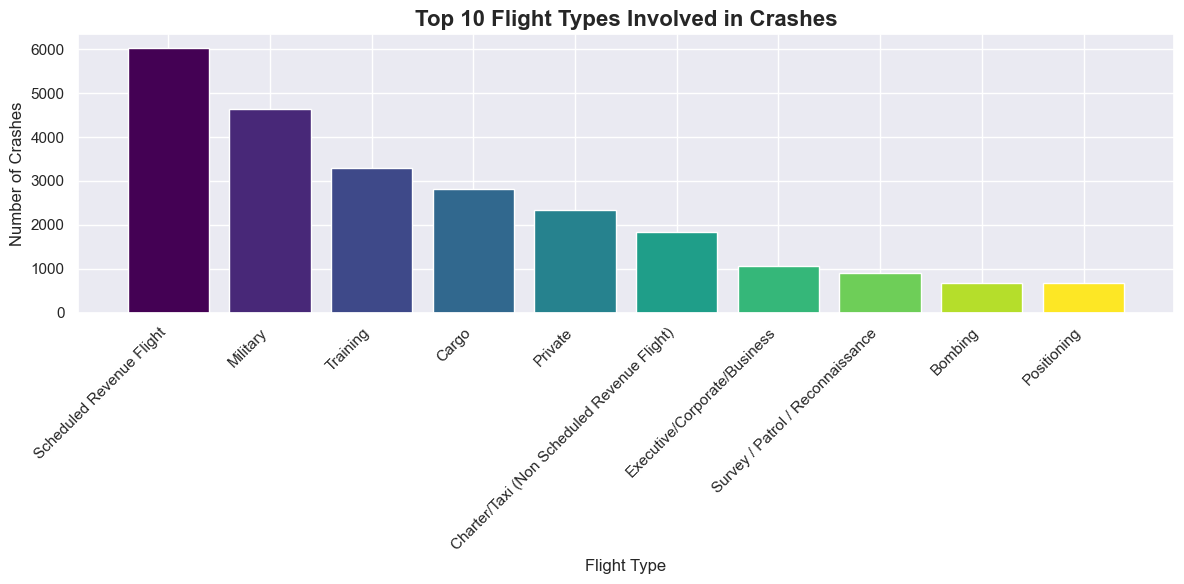

Military and training flights have historically been involved in more accidents.


In [5]:
plt.figure(figsize=(12, 6))
flight_types = df['Flight type'].value_counts().head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(flight_types)))
plt.bar(flight_types.index, flight_types.values, color=colors)
plt.title("Top 10 Flight Types Involved in Crashes", fontsize=16, fontweight='bold')
plt.xlabel("Flight Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Military and training flights have historically been involved in more accidents.")

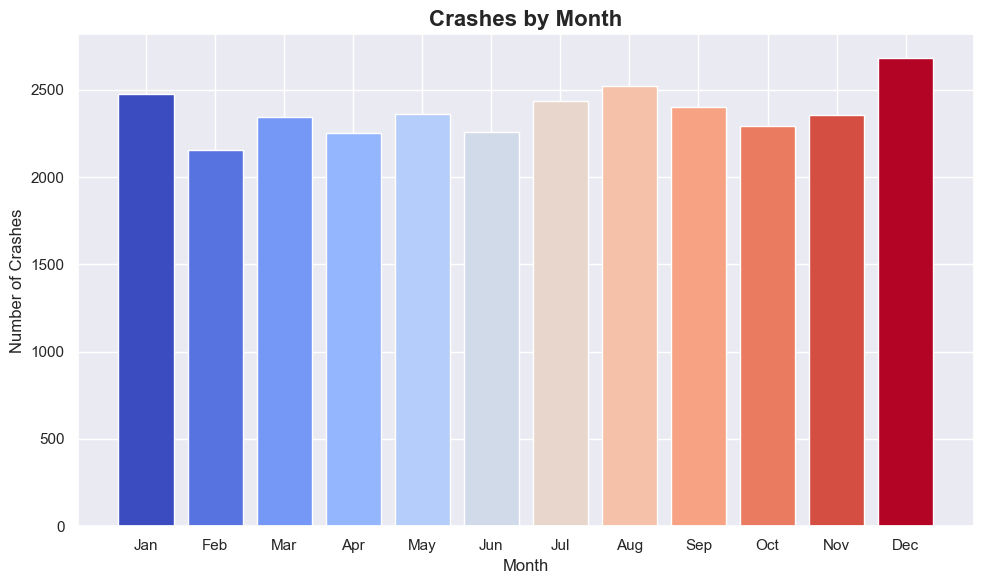

Crash frequency shows relatively consistent patterns across months with slight variations.


In [6]:
plt.figure(figsize=(10, 6))
monthly_crashes = df.groupby('Month').size()
colors = plt.cm.coolwarm(np.linspace(0, 1, 12))
plt.bar(monthly_crashes.index, monthly_crashes.values, color=colors)
plt.title("Crashes by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("Crash frequency shows relatively consistent patterns across months with slight variations.")

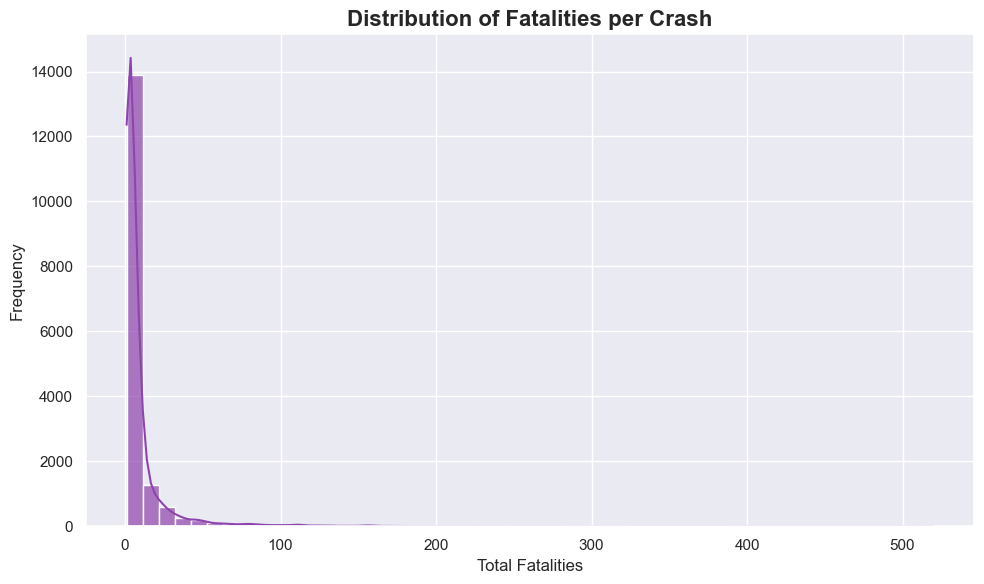

Most crashes result in relatively few fatalities, but some catastrophic events have very high death tolls.


In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Total fatalities'] > 0], x='Total fatalities', bins=50, kde=True, color='#8E44AD', alpha=0.7)
plt.title("Distribution of Fatalities per Crash", fontsize=16, fontweight='bold')
plt.xlabel("Total Fatalities")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Most crashes result in relatively few fatalities, but some catastrophic events have very high death tolls.")

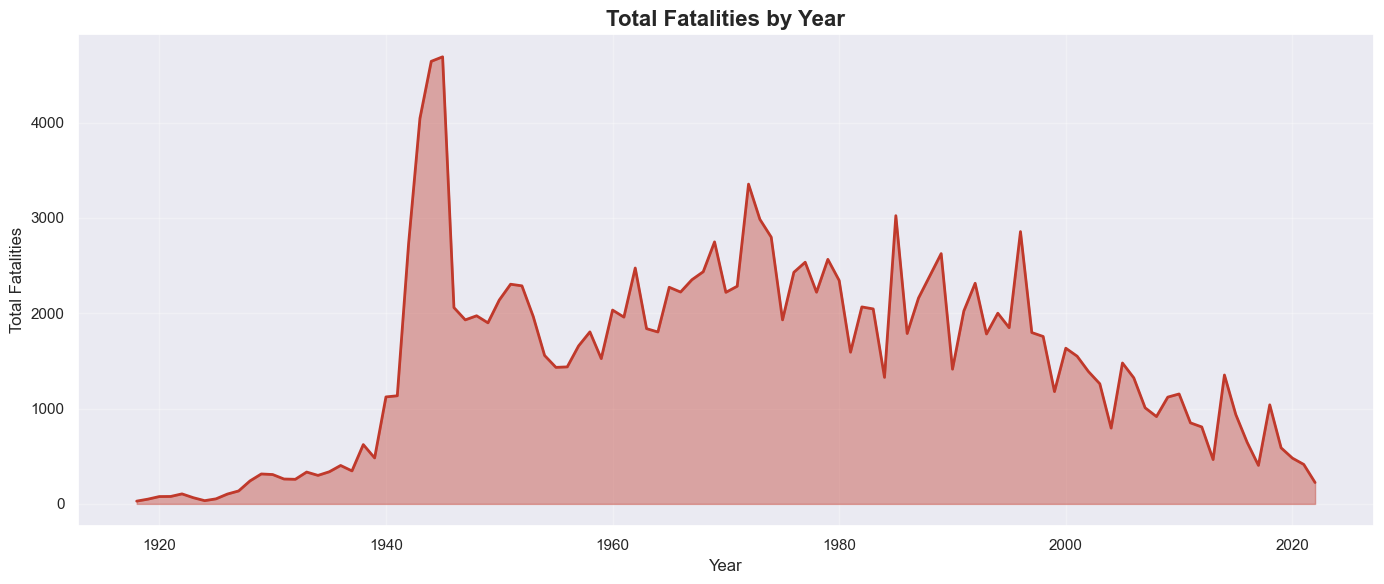

Fatality trends show peaks during certain periods, reflecting major aviation disasters.


In [8]:
plt.figure(figsize=(14, 6))
yearly_fatalities = df.groupby('Year')['Total fatalities'].sum()
plt.fill_between(yearly_fatalities.index, yearly_fatalities.values, alpha=0.4, color='#C0392B')
plt.plot(yearly_fatalities.index, yearly_fatalities.values, color='#C0392B', linewidth=2)
plt.title("Total Fatalities by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Fatality trends show peaks during certain periods, reflecting major aviation disasters.")

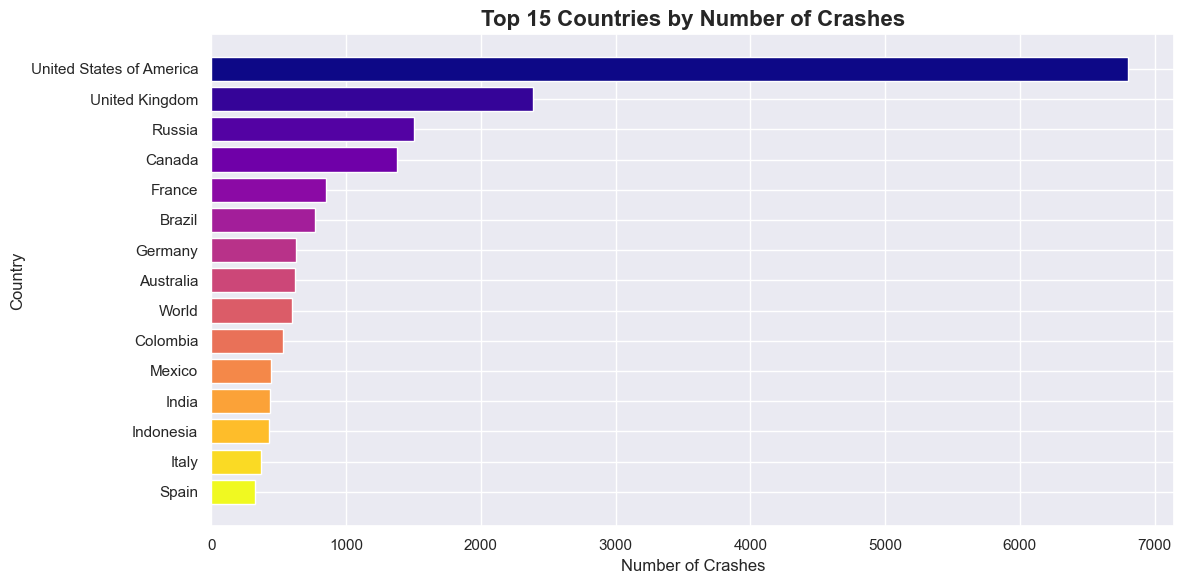

The United States leads in recorded crashes, likely due to higher air traffic volume and reporting standards.


In [9]:
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().head(15)
colors = plt.cm.plasma(np.linspace(0, 1, len(top_countries)))
plt.barh(top_countries.index, top_countries.values, color=colors)
plt.title("Top 15 Countries by Number of Crashes", fontsize=16, fontweight='bold')
plt.xlabel("Number of Crashes")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("The United States leads in recorded crashes, likely due to higher air traffic volume and reporting standards.")

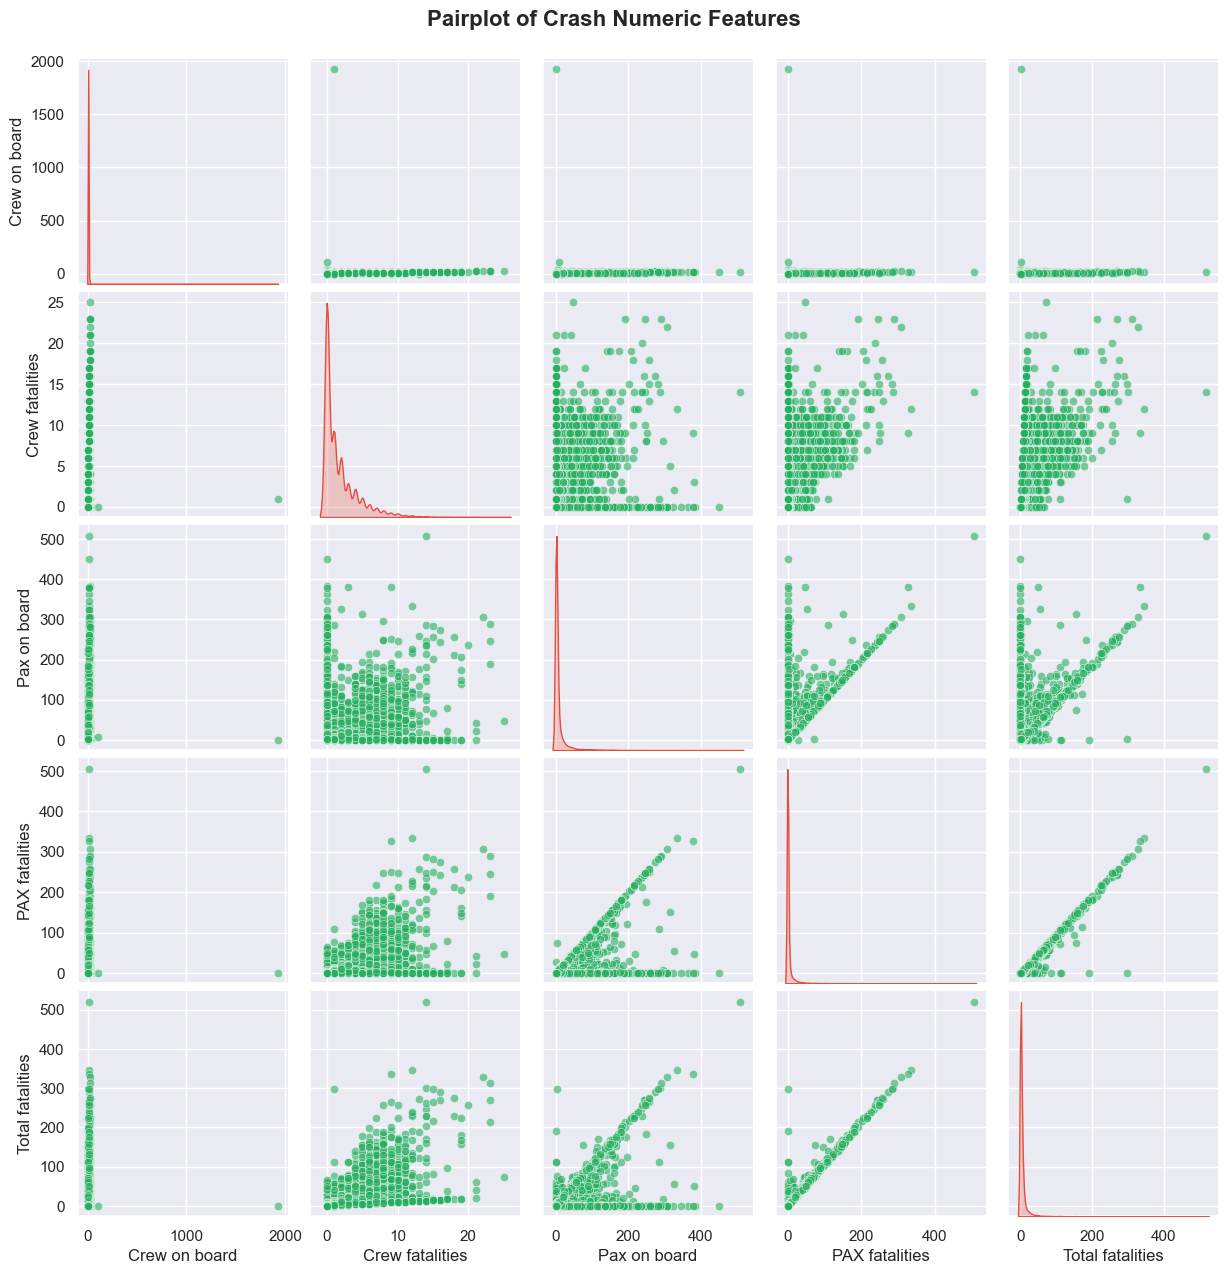

This pairplot shows relationships between all numeric crash variables.


In [10]:
numeric_cols = ['Crew on board', 'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Total fatalities']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr_data = df[numeric_cols].dropna()

sns.pairplot(corr_data, diag_kind='kde', plot_kws={'color': '#27AE60', 'alpha': 0.6}, diag_kws={'color': '#E74C3C'})
plt.suptitle('Pairplot of Crash Numeric Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("This pairplot shows relationships between all numeric crash variables.")

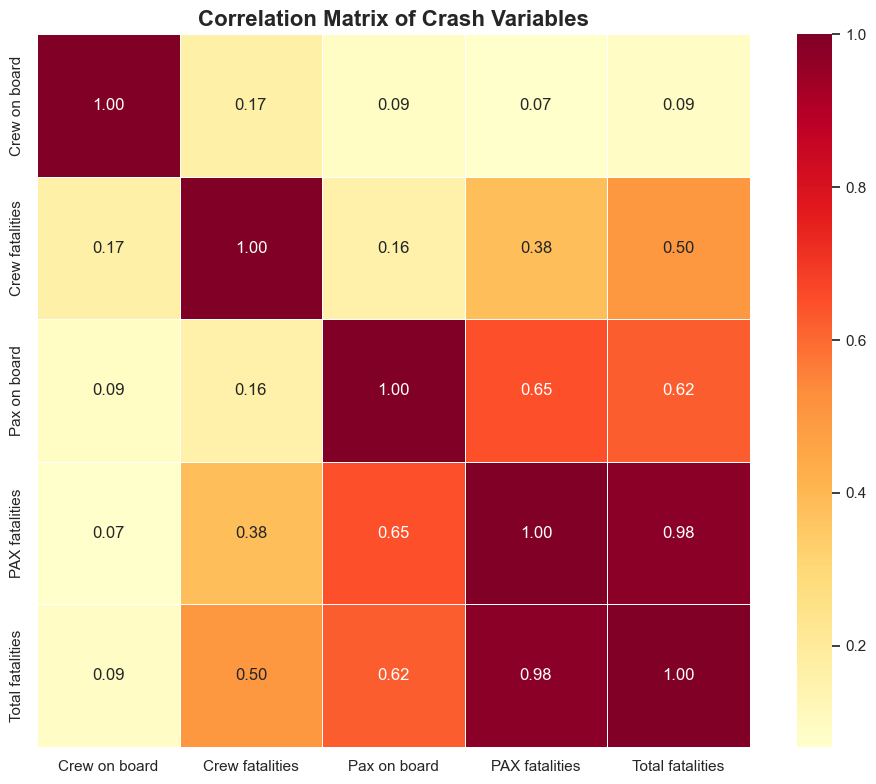

Strong correlations exist between passengers on board and passenger fatalities.


In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Crash Variables", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Strong correlations exist between passengers on board and passenger fatalities.")

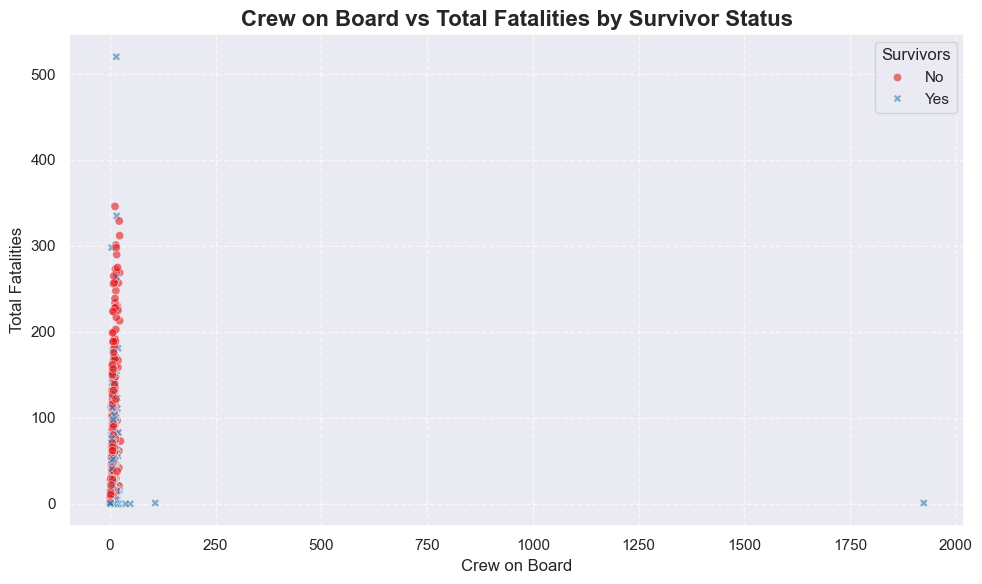

This scatter plot shows the relationship between crew size and fatalities based on survivor status.


In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Crew on board', y='Total fatalities', hue='Survivors', style='Survivors', alpha=0.6, palette='Set1')
plt.title('Crew on Board vs Total Fatalities by Survivor Status', fontsize=16, fontweight='bold')
plt.xlabel('Crew on Board')
plt.ylabel('Total Fatalities')
plt.legend(title='Survivors')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('This scatter plot shows the relationship between crew size and fatalities based on survivor status.')

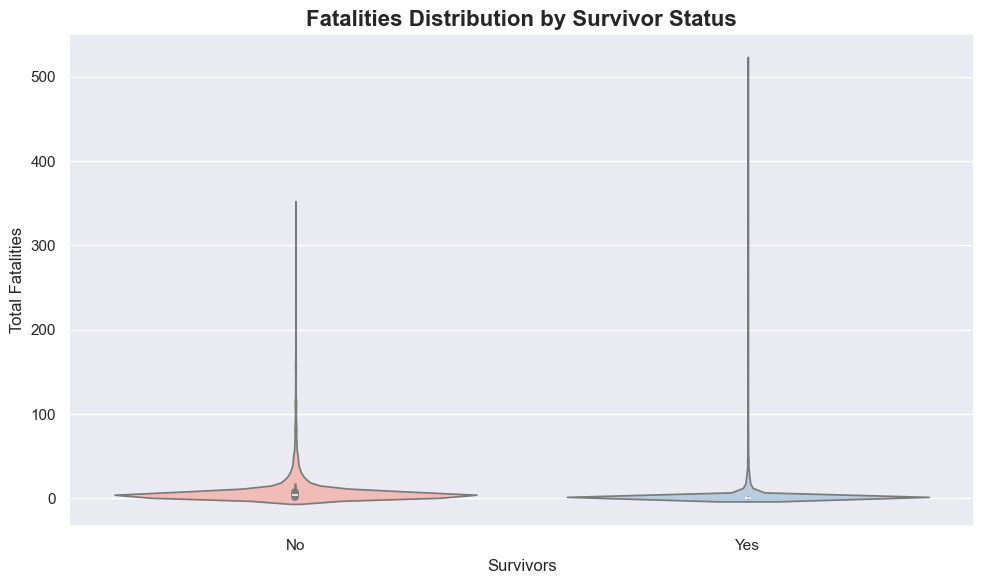

This violin plot shows how fatalities are distributed based on whether there were survivors.


In [13]:
plt.figure(figsize=(10, 6))
survivors_df = df[df['Survivors'].isin(['Yes', 'No'])]
sns.violinplot(x='Survivors', y='Total fatalities', data=survivors_df, hue='Survivors', palette='Pastel1', legend=False)
plt.title('Fatalities Distribution by Survivor Status', fontsize=16, fontweight='bold')
plt.xlabel('Survivors')
plt.ylabel('Total Fatalities')
plt.tight_layout()
plt.show()

print('This violin plot shows how fatalities are distributed based on whether there were survivors.')

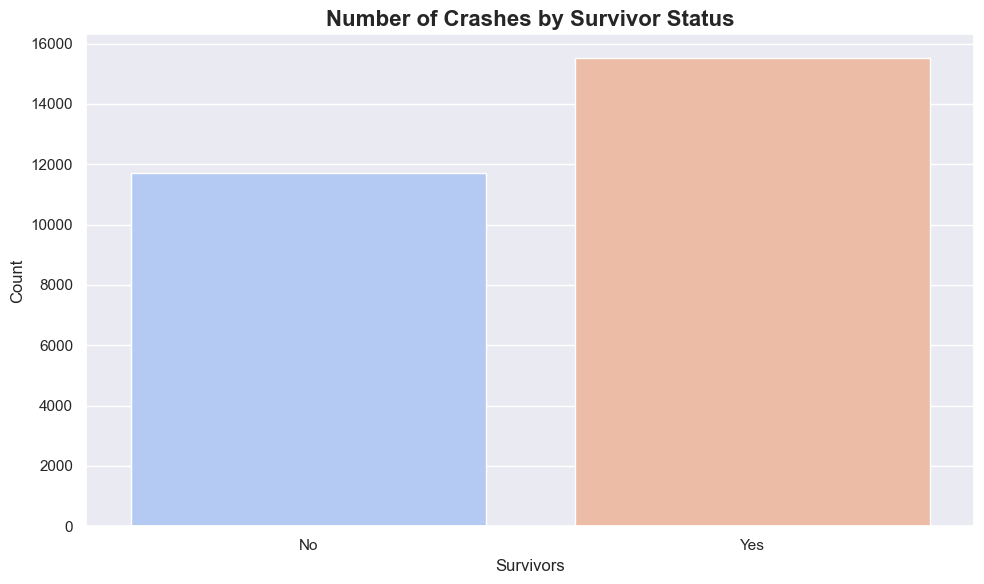

This count plot shows the distribution of crashes with and without survivors.


In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survivors', hue='Survivors', palette='coolwarm', legend=False)
plt.title('Number of Crashes by Survivor Status', fontsize=16, fontweight='bold')
plt.xlabel('Survivors')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print('This count plot shows the distribution of crashes with and without survivors.')

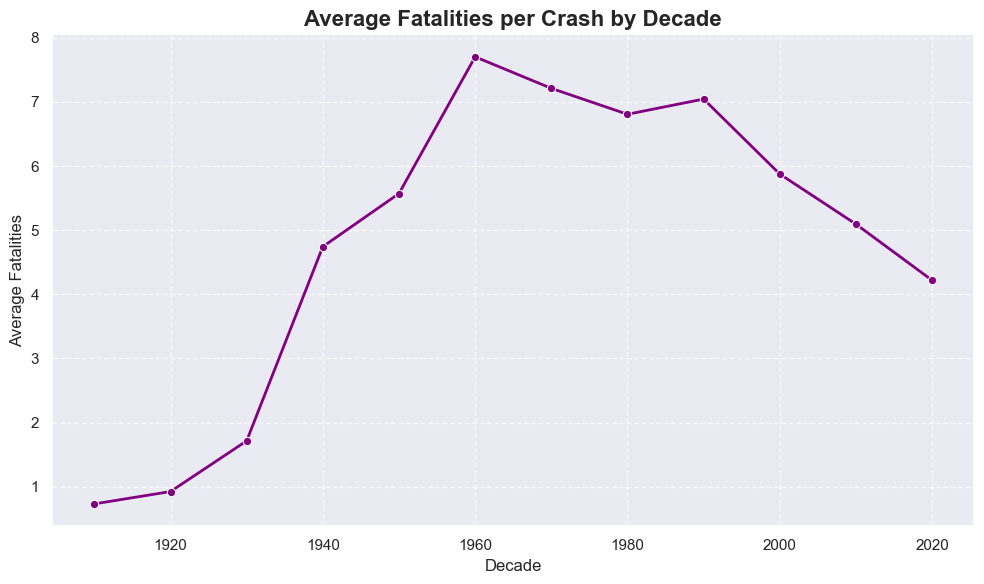

This line plot shows how average fatalities per crash have changed over decades.


In [15]:
decade_fatalities = df.groupby((df['Year'] // 10) * 10)['Total fatalities'].mean().reset_index()
decade_fatalities.columns = ['Decade', 'Avg_Fatalities']

plt.figure(figsize=(10, 6))
sns.lineplot(data=decade_fatalities, x='Decade', y='Avg_Fatalities', marker='o', color='purple', linewidth=2)
plt.title('Average Fatalities per Crash by Decade', fontsize=16, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('Average Fatalities')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('This line plot shows how average fatalities per crash have changed over decades.')

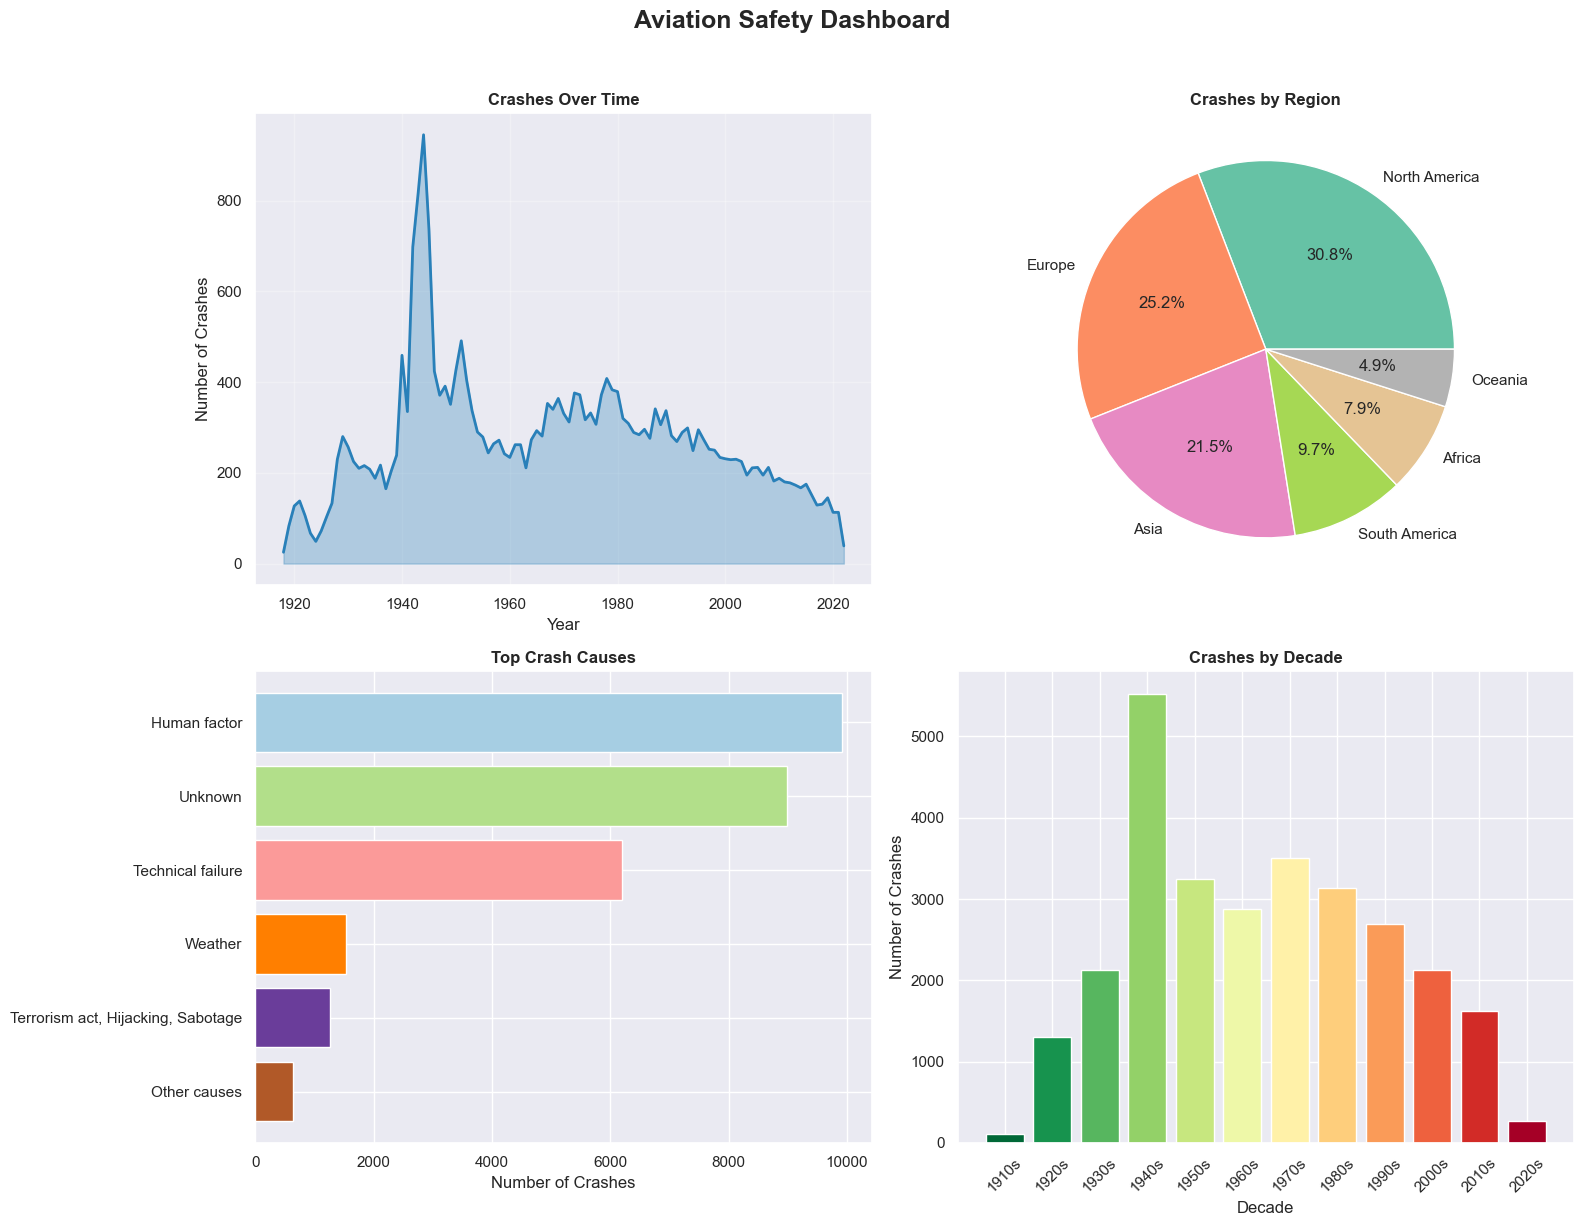

This dashboard provides a comprehensive overview of aviation safety trends and patterns.


In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

yearly_crashes = df.groupby('Year').size()
axes[0, 0].plot(yearly_crashes.index, yearly_crashes.values, color='#2980B9', linewidth=2)
axes[0, 0].fill_between(yearly_crashes.index, yearly_crashes.values, alpha=0.3, color='#2980B9')
axes[0, 0].set_title('Crashes Over Time', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Crashes')
axes[0, 0].grid(True, alpha=0.3)

region_data = df['Region'].value_counts().head(6)
colors1 = plt.cm.Set2(np.linspace(0, 1, len(region_data)))
axes[0, 1].pie(region_data.values, labels=region_data.index, autopct='%1.1f%%', colors=colors1)
axes[0, 1].set_title('Crashes by Region', fontweight='bold', fontsize=12)

cause_data = df['Crash cause'].value_counts().head(6)
colors2 = plt.cm.Paired(np.linspace(0, 1, len(cause_data)))
axes[1, 0].barh(cause_data.index, cause_data.values, color=colors2)
axes[1, 0].set_title('Top Crash Causes', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Number of Crashes')
axes[1, 0].invert_yaxis()

decade_crashes = df.groupby((df['Year'] // 10) * 10).size()
colors3 = plt.cm.RdYlGn_r(np.linspace(0, 1, len(decade_crashes)))
axes[1, 1].bar([str(int(d)) + 's' for d in decade_crashes.index], decade_crashes.values, color=colors3)
axes[1, 1].set_title('Crashes by Decade', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Decade')
axes[1, 1].set_ylabel('Number of Crashes')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Aviation Safety Dashboard', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("This dashboard provides a comprehensive overview of aviation safety trends and patterns.")

In [17]:
total_crashes = len(df)
total_fatalities = df['Total fatalities'].sum()
avg_fatalities = df['Total fatalities'].mean()
top_region = df['Region'].value_counts().index[0]
top_cause = df['Crash cause'].value_counts().index[0]
top_flight = df['Flight type'].value_counts().index[0]

print('OVERVIEW:')
print(f'Total crashes in dataset: {total_crashes:,}')
print(f'Total deaths recorded: {total_fatalities:,.0f}')
print(f'Average deaths per crash: {avg_fatalities:.1f}\n')

print('REGIONAL ANALYSIS:')
print(f'Region with most crashes: {top_region}\n')

print('CRASH CAUSES:')
print(f'Most common cause: {top_cause}\n')

print('FLIGHT TYPES:')
print(f'Most affected category: {top_flight}\n')

print('CONCLUSION:')
print('The visualizations show how crash patterns have changed over time.')
print('Safety measures and technology have helped reduce incidents in recent decades.')

OVERVIEW:
Total crashes in dataset: 28,536
Total deaths recorded: 158,871
Average deaths per crash: 5.6

REGIONAL ANALYSIS:
Region with most crashes: North America

CRASH CAUSES:
Most common cause: Human factor

FLIGHT TYPES:
Most affected category: Scheduled Revenue Flight

CONCLUSION:
The visualizations show how crash patterns have changed over time.
Safety measures and technology have helped reduce incidents in recent decades.
